In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import os
from sklearn.model_selection import GridSearchCV

# Data Import

In [2]:
df = pd.read_excel("D:/Trisem 5/AML/Final Assignment/Data/AML_PC_Data_Final_processed.xlsx")
df.head()

,Country Name,Country Cod,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,Monaco,MCO,yes,36686,21.55,7.14,1.30,8.53,6.30,99.0,8551109.0,54.15,0.622,0.04,11.86,0.000
1,Luxembourg,LUX,yes,640064,5.10,4.38,2.53,211.43,5.23,100.0,273924415.0,54.78,0.792,47.70,22.88,0.930
2,Bermuda,BMU,yes,63867,5.41,6.79,0.90,48.72,7.08,98.0,1169225.0,66.94,0.726,59.37,42.10,0.981
3,Ireland,IRL,yes,5033165,13.59,15.34,2.36,134.41,6.63,99.0,476670190.0,67.51,0.918,35.90,38.95,0.945
4,Switzerland,CHE,yes,8703405,4.22,10.13,0.58,71.37,5.32,99.0,11809503.0,54.87,0.897,62.06,35.87,0.962


In [3]:
#convert yes - 1 and no -0
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['PerCapitaabove10k']= label_encoder.fit_transform(df['PerCapitaabove10k'])

# Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country Name                                   194 non-null    object 
 1   Country Cod                                    194 non-null    object 
 2   PerCapitaabove10k                              194 non-null    int32  
 3   Population                                     194 non-null    int64  
 4   GDP Growth Rate                                194 non-null    float64
 5   GNI rate                                       194 non-null    float64
 6   Inflation rate                                 194 non-null    float64
 7   Export growth rate (% of GDP)                  194 non-null    float64
 8   Unemplument rate                               194 non-null    float64
 9   Literacy Rate                                  194 non

# Univariate Analysis

In [5]:
df.describe()

,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
count,194.000000,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.402062,3.213573e+07,5.080155,4.623273,8.894564,38.250773,8.676082,89.898616,9.209576e+07,63.979897,0.665108,76.248351,21.115858,0.724665
std,0.491583,1.105863e+08,6.156462,7.647503,31.526889,33.829474,6.065745,17.068554,3.216596e+08,5.998419,0.169981,18.880664,13.889994,0.162519
min,0.000000,1.120400e+04,-20.740000,-61.340000,-0.770000,-81.400000,0.260000,5.400000,1.391500e+02,48.680000,0.214000,0.040000,-49.410000,0.000000
25%,0.000000,1.279780e+06,2.470000,2.175000,2.007500,18.130000,4.387500,88.912500,9.835830e+05,60.807500,0.535000,67.155000,13.697500,0.609000
50%,0.000000,6.842433e+06,4.470000,5.025000,3.490000,31.785000,6.750000,98.500000,5.206991e+06,64.840000,0.691500,77.085000,20.725000,0.746000
75%,1.000000,2.671215e+07,7.355000,8.155000,5.785000,48.415000,11.460000,98.500000,2.473765e+07,67.497500,0.800000,87.247500,28.887500,0.845000
max,1.000000,1.412360e+09,41.750000,38.690000,382.820000,211.430000,28.390000,100.000000,2.827397e+09,83.100000,0.940000,149.410000,59.140000,0.981000


# Bi-Variate Analysis

In [6]:
df.corr()

,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
PerCapitaabove10k,1.000000,0.045833,0.117289,0.085995,-0.143200,0.348749,-0.227483,0.411418,0.023560,0.079683,0.651239,-0.441046,0.184223,0.606985
Population,0.045833,1.000000,0.016670,0.037958,0.002540,-0.110492,-0.110799,0.003995,-0.037596,0.191656,-0.035483,-0.063006,0.152026,0.013480
GDP Growth Rate,0.117289,0.016670,1.000000,0.537260,-0.041795,0.224114,0.063208,0.195235,0.033510,-0.078282,0.135163,-0.123268,0.119268,0.123263
GNI rate,0.085995,0.037958,0.537260,1.000000,-0.064138,0.067686,0.054323,0.002165,0.051810,0.020351,0.057102,0.040292,0.035962,0.100453
Inflation rate,-0.143200,0.002540,-0.041795,-0.064138,1.000000,-0.108341,0.171823,-0.108580,-0.002659,-0.088850,-0.169886,0.121032,-0.057324,-0.118842
Export growth rate (% of GDP),0.348749,-0.110492,0.224114,0.067686,-0.108341,1.000000,-0.038959,0.262173,0.074770,-0.050336,0.330905,-0.262058,0.248200,0.381975
Unemplument rate,-0.227483,-0.110799,0.063208,0.054323,0.171823,-0.038959,1.000000,0.072454,0.056025,-0.015668,-0.014602,0.117433,-0.180452,-0.074179
Literacy Rate,0.411418,0.003995,0.195235,0.002165,-0.108580,0.262173,0.072454,1.000000,-0.029092,0.067474,0.725482,-0.350430,0.339144,0.569518
Total Labor Force,0.023560,-0.037596,0.033510,0.051810,-0.002659,0.074770,0.056025,-0.029092,1.000000,0.036634,0.086236,0.045538,-0.078998,0.059135
Population ages 15-64 (% of total population),0.079683,0.191656,-0.078282,0.020351,-0.088850,-0.050336,-0.015668,0.067474,0.036634,1.000000,0.116153,-0.039030,-0.006255,0.160845


# BOX Plot

<AxesSubplot:>

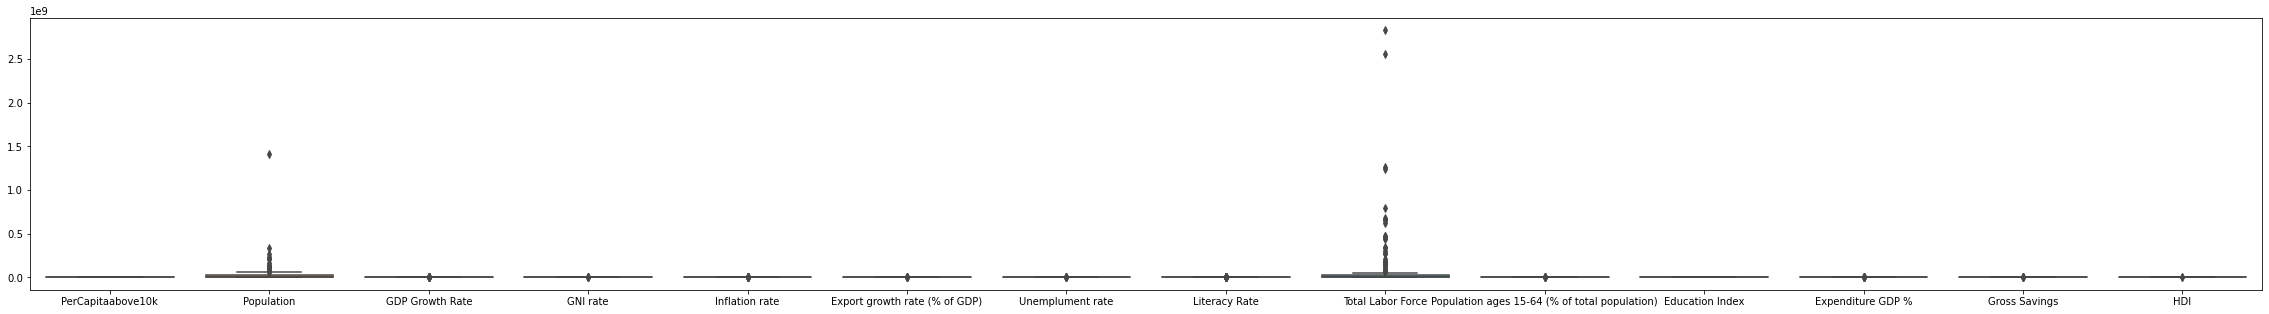

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40, 5))

sns.boxplot(data=df)

# Outlier Treatment

In [8]:
#Population
q1 = df['Population'].quantile(0.25)
q3 = df['Population'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(-36868776.0, 64860708.0)

In [9]:
df['Population']=np.where(df['Population'] > high,high,df['Population']) # upper limit

In [10]:
#Total Labor Force
q1 = df['Total Labor Force'].quantile(0.25)
q3 = df['Total Labor Force'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(-34647517.5, 60368750.5)

In [11]:
df['Total Labor Force']=np.where(df['Total Labor Force'] > high,high,df['Total Labor Force']) # upper limit

<AxesSubplot:>

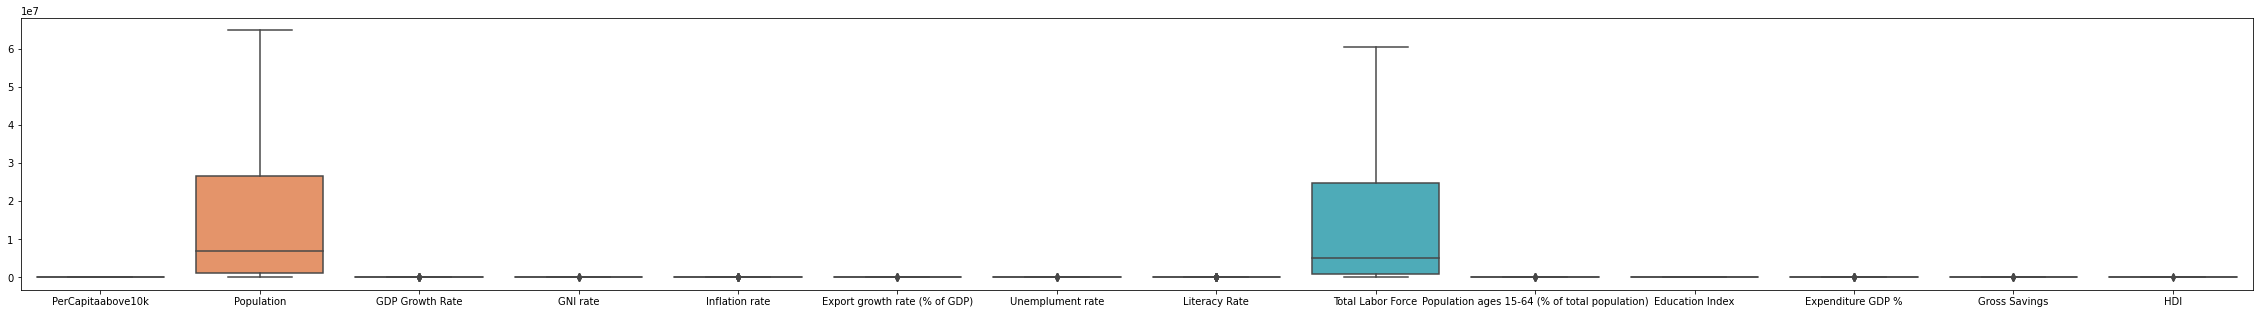

In [12]:
fig, ax = plt.subplots(figsize=(40, 5))
sns.boxplot(data=df)

In [13]:
df.head()

,Country Name,Country Cod,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,Monaco,MCO,1,36686.0,21.55,7.14,1.30,8.53,6.30,99.0,8551109.0,54.15,0.622,0.04,11.86,0.000
1,Luxembourg,LUX,1,640064.0,5.10,4.38,2.53,211.43,5.23,100.0,60368750.5,54.78,0.792,47.70,22.88,0.930
2,Bermuda,BMU,1,63867.0,5.41,6.79,0.90,48.72,7.08,98.0,1169225.0,66.94,0.726,59.37,42.10,0.981
3,Ireland,IRL,1,5033165.0,13.59,15.34,2.36,134.41,6.63,99.0,60368750.5,67.51,0.918,35.90,38.95,0.945
4,Switzerland,CHE,1,8703405.0,4.22,10.13,0.58,71.37,5.32,99.0,11809503.0,54.87,0.897,62.06,35.87,0.962


# Verify Null Value

In [14]:
df.isnull().sum()

Country Name                                     0
Country Cod                                      0
PerCapitaabove10k                                0
Population                                       0
GDP Growth Rate                                  0
GNI rate                                         0
Inflation rate                                   0
Export growth rate (% of GDP)                    0
Unemplument rate                                 0
Literacy Rate                                    0
Total Labor Force                                0
Population ages 15-64 (% of total population)    0
Education Index                                  0
Expenditure GDP %                                0
Gross Savings                                    0
HDI                                              0
dtype: int64

# Drop Unnecessary Columns

In [16]:
df.drop(['Country Name', 'Country Cod'],axis = 1, inplace=True)
df.head()

,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,1,36686.0,21.55,7.14,1.30,8.53,6.30,99.0,8551109.0,54.15,0.622,0.04,11.86,0.000
1,1,640064.0,5.10,4.38,2.53,211.43,5.23,100.0,60368750.5,54.78,0.792,47.70,22.88,0.930
2,1,63867.0,5.41,6.79,0.90,48.72,7.08,98.0,1169225.0,66.94,0.726,59.37,42.10,0.981
3,1,5033165.0,13.59,15.34,2.36,134.41,6.63,99.0,60368750.5,67.51,0.918,35.90,38.95,0.945
4,1,8703405.0,4.22,10.13,0.58,71.37,5.32,99.0,11809503.0,54.87,0.897,62.06,35.87,0.962


# Divide decision variable

In [17]:
inputs = df.drop('PerCapitaabove10k', axis = 'columns')
target = df.PerCapitaabove10k


# Split data - 80:20

In [18]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=.2,random_state=20)

print("Train Data Size - ",x_train.shape[0],'\n')
print("Test Data Size - ",x_test.shape[0],'\n')
 

Train Data Size -  155 

Test Data Size -  39 



In [19]:
x_test.head()

,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
28,271030.0,2.10,2.56,1.45,30.83,16.57,98.50,16883864.0,64.56,0.899,23.50,25.01,0.000
185,25252722.0,1.39,11.25,3.84,10.28,0.75,37.34,9902465.0,64.55,0.214,89.38,13.06,0.400
59,19493184.0,11.67,12.14,4.52,31.89,9.13,97.04,3356998.0,69.82,0.800,75.33,18.73,0.855
13,17533044.0,4.86,5.99,2.68,82.98,4.01,98.50,3042491.0,64.76,0.906,68.29,28.63,0.941
51,4520471.0,3.09,2.93,1.55,52.53,3.12,98.50,2971470.0,64.94,0.706,66.45,17.55,0.816


# KNN

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [22]:
y_pred = classifier.predict(x_test)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Confusion Matrix:
[[19  8]
 [ 7  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.38      0.42      0.40        12

    accuracy                           0.62        39
   macro avg       0.56      0.56      0.56        39
weighted avg       0.62      0.62      0.62        39

Accuracy: 0.6153846153846154


In [24]:
df2 = pd.read_excel("D:/Trisem 5/AML/Final Assignment/Data/Test_Data_Ind.xlsx")
df2.head()


,Country Name,Country Cod,Per Capita above 10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,India,IND,2256.59,1407563842,8.68,8.42,5.13,21.4,5.98,74.37,476670190,67.8,0.556,70.69,30.21,0.633


In [25]:
df2.drop(['Per Capita above 10k', 'Country Cod', 'Country Name' ], axis = 'columns', inplace = True )
df2.head()

,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,1407563842,8.68,8.42,5.13,21.4,5.98,74.37,476670190,67.8,0.556,70.69,30.21,0.633


In [26]:
#For India
#Getting our Predictions 
y_pred = classifier.predict(df2)
y_pred

array([0])

In [27]:
newdf=pd.DataFrame()
newdf= df2

newdf["Predicted PERCAPita"]=y_pred
print(newdf)

   Population  GDP Growth Rate  GNI rate  Inflation rate  \
0  1407563842             8.68      8.42            5.13   

   Export growth rate (% of GDP)  Unemplument rate  Literacy Rate  \
0                           21.4              5.98          74.37   

   Total Labor Force  Population ages 15-64 (% of total population)  \
0          476670190                                           67.8   

   Education Index  Expenditure GDP %  Gross Savings    HDI  \
0            0.556              70.69          30.21  0.633   

   Predicted PERCAPita  
0                    0  


# Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB


In [29]:
model = GaussianNB()

In [30]:
model.fit(x_train,y_train )

GaussianNB()

In [31]:
model.score(x_train, y_train)

0.5741935483870968

In [32]:
model.score(x_test, y_test)

0.6923076923076923

In [33]:
Y_train_pred=model.predict(x_test)
Y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
new_df=pd.DataFrame()
new_df= x_test
new_df["Actual PERCAPita"]=y_test
new_df["Predicted PERCAPita"]=Y_train_pred
print(new_df)

     Population  GDP Growth Rate  GNI rate  Inflation rate  \
28     271030.0             2.10      2.56          1.4500   
185  25252722.0             1.39     11.25          3.8400   
59   19493184.0            11.67     12.14          4.5200   
13   17533044.0             4.86      5.99          2.6800   
51    4520471.0             3.09      2.93          1.5500   
132   4922749.0             7.05      9.66          1.2400   
181  45657202.0            -1.87     -0.26        382.8200   
127  12262946.0             4.32      4.41          5.7100   
104     11204.0             2.99      7.94          2.0000   
126    218764.0            -7.08     -5.41          3.1300   
186  64860708.0             6.20      6.80          8.9900   
133    113131.0            -3.19     -1.15          2.1000   
106   1786038.0            10.75     10.13          3.3500   
129  64860708.0             2.56      1.65          1.8300   
34    1244188.0             6.64      4.93          2.4500   
103   67

# Import India data

In [35]:
df2 = pd.read_excel("D:/Trisem 5/AML/Final Assignment/Data/Test_Data_Ind.xlsx")
df2.head()


,Country Name,Country Cod,Per Capita above 10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,India,IND,2256.59,1407563842,8.68,8.42,5.13,21.4,5.98,74.37,476670190,67.8,0.556,70.69,30.21,0.633


In [36]:
X =df2.drop(['Country Name', 'Country Cod', 'Per Capita above 10k' ], axis = 'columns', inplace = True )
df2.head()

,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,1407563842,8.68,8.42,5.13,21.4,5.98,74.37,476670190,67.8,0.556,70.69,30.21,0.633


In [37]:
Y_pred=model.predict(df2)
Y_pred

array([1])

In [38]:
model.score(df2, Y_pred)

1.0

In [39]:
new_df=pd.DataFrame()
new_df= df2

new_df["Predicted PERCAPita"]=Y_pred
print(new_df)

   Population  GDP Growth Rate  GNI rate  Inflation rate  \
0  1407563842             8.68      8.42            5.13   

   Export growth rate (% of GDP)  Unemplument rate  Literacy Rate  \
0                           21.4              5.98          74.37   

   Total Labor Force  Population ages 15-64 (% of total population)  \
0          476670190                                           67.8   

   Education Index  Expenditure GDP %  Gross Savings    HDI  \
0            0.556              70.69          30.21  0.633   

   Predicted PERCAPita  
0                    1  
